# 기초 MLP 실습

Import torch

In [1]:
import torch
import torch.nn as nn

Device check(gpu)

In [2]:
# device check
print(torch.cuda.is_available())

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device, type(device))


True
cuda <class 'torch.device'>


## XOR problem

![img](https://github.com/june-oh/2023_AI_Academy_ASR/blob/main/img/xor_table.jpg?raw=true)

Dataset

In [3]:
# define X, Y
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[0],[1],[1],[0]]

In [4]:
# define torch.tensor X, Y
X=torch.tensor(X, dtype=torch.float)
Y=torch.tensor(Y, dtype=torch.float)

In [5]:
# check X and type of X
X, X.dtype

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 torch.float32)

In [6]:
# check Y and type of Y
Y, Y.dtype

(tensor([[0.],
         [1.],
         [1.],
         [0.]]),
 torch.float32)

## Perceptron

<img src="https://github.com/june-oh/2023_AI_Academy_ASR/blob/main/img/perceptron.jpg?raw=true" width=450>

### nn.sequential
- 여러 neural network layer를 순서대로 적용하는 컨테이너

### nn.linear
- linear transform layer
- arg
  - in_features  : 입력 노드의 개수
  - out_features : 출력 노드의 개수

### nn.Sigmoid
- sigmoid function
- output = 0~1
- used in binary classification problem

In [7]:
??nn.Sequential

In [8]:
??nn.Linear

In [9]:
??nn.Sigmoid

Define Model

In [10]:
#define basic model
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [11]:
# check model
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [12]:
# sample input
sample_input = torch.tensor([0,0], dtype=torch.float)
model(sample_input)

tensor([0.6116], grad_fn=<SigmoidBackward0>)

## Loss Function
- 예측값과 실제 값 사이의 차이를 측정하는 함수
- 이 손실 함수를 최소화하는 파라미터를 찾는 것이 딥러닝의 목적
### nn.BCELoss
- Binary Cross Entropy Loss
- used in binary classification

## Optimizer
- 손실함수의 값을 최소화하는 모델의 파라미터를 찾는 알고리즘
### optim.SGD
- Stochastic Gradient Descent(SGD)
    - Mini-Batch를 이용한 Gradient Descent
### optim.Adam
- Adaptive Moment Estimation(Adam)
    - SGD + momentum + RMSprop




In [13]:
??torch.nn.BCELoss

In [14]:
??torch.optim.SGD

Define loss function and optimizer

In [15]:
# model parameter check
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0844, -0.3661]], requires_grad=True),
 Parameter containing:
 tensor([0.4541], requires_grad=True)]

In [16]:
# define loss_fn , optimizer
loss_fn = torch.nn.BCELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.001)

### Train loop

- epoch (전체데이터)
  - batch (batch data)


In [17]:
# Train loop
from tqdm.auto import tqdm

# epoch
n_epoch= 10**4

# model to device
model.to(device)
X = X.to(device)
Y = Y.to(device)

# loss tracking
losses = []


#training loop
for epoch in tqdm(range(n_epoch)):
  # gradient init
  optim.zero_grad()

  # prediction
  pred = model(X)

  # loss
  loss = loss_fn(pred, Y)

  # gradient backpropagation
  loss.backward()

  # loss tracking
  if epoch % 10 ==0:
    losses.append(loss.item())

  # model parameter update
  optim.step()



  0%|          | 0/10000 [00:00<?, ?it/s]

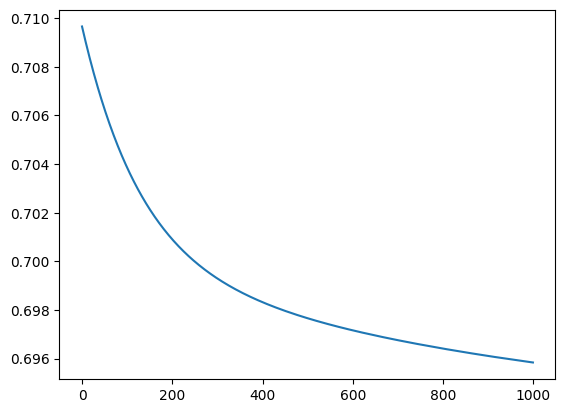

0.6958434581756592


In [18]:
# check loss
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.show()

print(losses[-1])


In [19]:
# Inference
model(X)


tensor([[0.5490],
        [0.4787],
        [0.5391],
        [0.4687]], device='cuda:0', grad_fn=<SigmoidBackward0>)

## define MLP model

In [26]:
# define MLP model
mlp_model = nn.Sequential(
    nn.Linear(2,2,bias=True),
    nn.Sigmoid(),
    nn.Linear(2,1,bias=True),
    nn.Sigmoid()
)

In [27]:
mlp_model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

모델을 학습할때 lr을 충분히 크게(e.g., lr = 0.1) 줘야 학습이 용이

In [28]:
# define loss function and optimizer
loss_fn = torch.nn.BCELoss()
optim = torch.optim.Adam(mlp_model.parameters(), lr=0.01)

In [29]:


# Train loop
# epoch
n_epoch= 10**4

# model to device
mlp_model.to(device)
X = X.to(device)
Y = Y.to(device)

# loss tracking
losses = []


pbar = tqdm(range(n_epoch))
for epoch in pbar:
  # gradient init
  optim.zero_grad()

  # prediction
  pred = mlp_model(X)

  # loss
  loss = loss_fn(pred, Y)

  # gradient backpropagation
  loss.backward()

  pbar.desc = f"loss : {loss.item()}"

  # loss tracking
  if epoch % 10 ==0:
    losses.append(loss.item())

  # model parameter update
  optim.step()



  0%|          | 0/10000 [00:00<?, ?it/s]

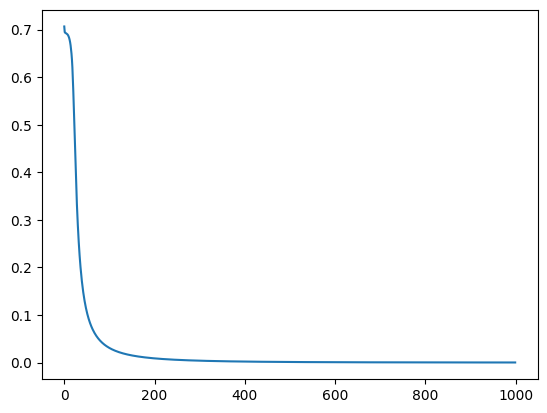

8.157946285791695e-05


In [30]:
# check loss
plt.plot(losses)
plt.show()

print(losses[-1])


In [31]:
# Inference
torch.set_printoptions(precision=20,sci_mode=False)
mlp_model(X)

tensor([[    0.00007816125435056165],
        [    0.99992001056671142578],
        [    0.99991178512573242188],
        [    0.00007831882248865440]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)